#  GPS Tracking of Birds

We will use a small data set that consists of migration data for three gulls named Eric, Nico, and Sanne.
The csv file contains eight columns, and includes variables like latitude, longitude, altitude, and time stamps.
In this case study, we will first load the data, visualize some simple flight trajectories,
track flight speed, learn about daytime and much, much more.

In [22]:
import pandas as pd
import numpy as np
bird_data = pd.read_csv("bird_tracking.csv")
bird_data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


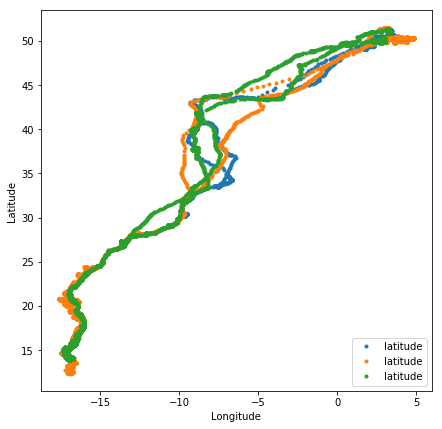

In [23]:
import matplotlib.pyplot as plt

bird_names = pd.unique(bird_data["bird_name"])
plt.figure(figsize=(7, 7))
for name in bird_names:
    index_of_name = bird_data.bird_name == name
    x , y = bird_data.longitude[index_of_name], bird_data.latitude[index_of_name]
    plt.plot(x, y, ".")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc = "lower right")
plt.show()
    

Draw histgram of **Eric** speed but first remove the non number **NAN**

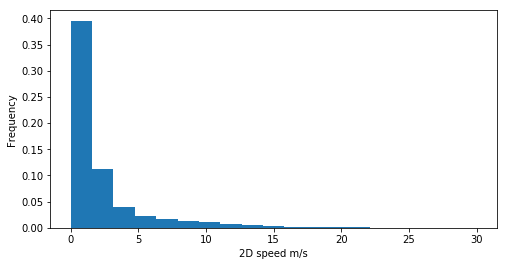

In [24]:
index_of_name = bird_data.bird_name == "Eric"
speed = bird_data.speed_2d[index_of_name]
ind = np.isnan(speed)

plt.figure(figsize=(8, 4))
plt.hist(speed[~ind], bins =np.linspace(0,30, 20), density = True)
plt.xlabel("2D speed m/s")
plt.ylabel("Frequency")
plt.show()

In [25]:
import datetime

time_1 = datetime.datetime.today()

timestamps = []
for k in range(len(bird_data)):
    timestamps.append(datetime.datetime.strptime(bird_data.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
timestamps[:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [26]:
bird_data["timestamp"] = pd.Series(timestamps, index = bird_data.index)
bird_data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [39]:
times = bird_data.timestamp[bird_data.bird_name == "Eric"]
elapsed_time = [time - times.iloc[0] for time in times]
elapsed_time[:3]


[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50')]

To measure time in certain units, like hours or days,We can take the object,and divide that by a time delta object.
In this case, if I'd like to know how many days have passed.

In [28]:
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days = 1)
elapsed_days[100:120]

array([1.225474537037037, 1.2358796296296297, 1.2465277777777777,
       1.2569328703703704, 1.2673148148148148, 1.277673611111111,
       1.2880439814814815, 1.2985300925925927, 1.3089930555555556,
       1.3193518518518519, 1.3297337962962963, 1.3400925925925926,
       1.350451388888889, 1.3608217592592593, 1.3711921296296297,
       1.3819444444444444, 1.3923032407407407, 1.4027083333333332,
       1.4130787037037038, 1.4234490740740742], dtype=object)

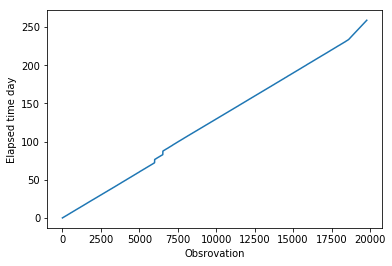

In [29]:
plt.plot(elapsed_days)
plt.xlabel("Obsrovation")
plt.ylabel("Elapsed time day")
plt.show()

Our next goal is to create a plot where on the y-axis,we have the mean daily speed.
And on the x-axis, we have time measured in days.

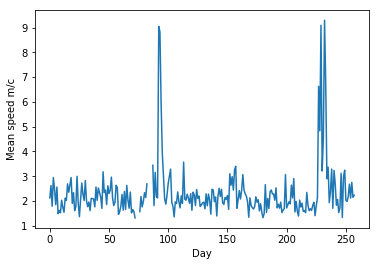

In [30]:
data = bird_data[bird_data.bird_name == "Eric"]

daily_mean_speed = []
next_day = 1
indx = []

for i, t in enumerate(elapsed_days):
    if t < next_day:
        indx.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[indx])) #compute mean speed 
        next_day += 1
        indx = []
                                
plt.figure()
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed m/c")
plt.show()

Our next step is to import  **Cartopy**, a library that provides cartographic tools for Python.

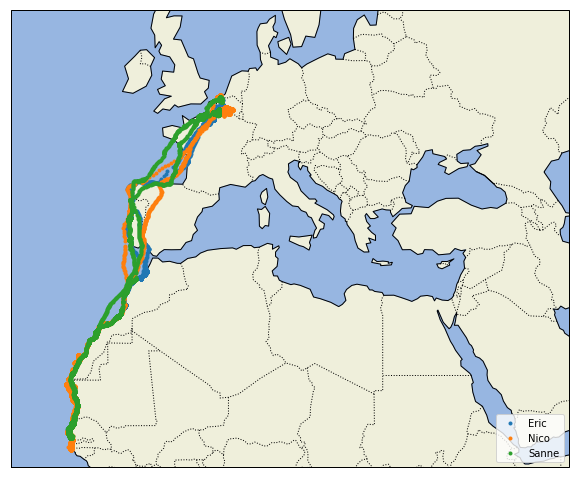

In [31]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

pro = ccrs.Mercator()

plt.figure(figsize = (10,10))
ax = plt.axes(projection = pro)
ax.set_extent((-25.0, 50.0, 52.0 , 10.0))

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

for name in bird_names:
    index_of_name = bird_data.bird_name == name
    x , y = bird_data.longitude[index_of_name], bird_data.latitude[index_of_name]
    ax.plot(x, y, ".", transform = ccrs.Geodetic(),label = name)

plt.legend(loc = "lower right")
plt.show()

In [40]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = bird_data.groupby(["bird_name"])

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds["speed_2d"].mean()

# Use the `head()` method prints the first 5 lines of each bird.
print(grouped_birds.head())

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds["altitude"].mean()
print(mean_speeds)
print(mean_altitudes)


       altitude           date_time  device_info_serial   direction  \
0            71 2013-08-15 00:18:08                 851 -150.469753   
1            68 2013-08-15 00:48:07                 851 -136.151141   
2            68 2013-08-15 01:17:58                 851  160.797477   
3            73 2013-08-15 01:47:51                 851   32.769360   
4            69 2013-08-15 02:17:42                 851   45.191230   
19795       382 2013-08-15 00:20:45                 864  145.179141   
19796       197 2013-08-15 00:51:00                 864  -25.393443   
19797       206 2013-08-15 01:21:08                 864  158.480445   
19798       200 2013-08-15 01:50:57                 864  139.613245   
19799       199 2013-08-15 02:20:48                 864 -134.485593   
40916        55 2013-08-15 00:01:08                 833  -91.499509   
40917        54 2013-08-15 00:31:00                 833 -141.804053   
40918        55 2013-08-15 01:01:19                 833  -10.651840   
40919 

We will group the flight times by date and calculate the mean altitude within that day.

In [33]:
# Convert birddata.date_time to the `pd.datetime` format.
bird_data.date_time = pd.to_datetime(bird_data.date_time)

# Create a new column of day of observation
bird_data["date"] = bird_data.date_time.dt.date


# Use `groupby()` to group the data by date.
grouped_bydates = bird_data.groupby("date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()


# Check the head of the column.
bird_data.date.head()

0    2013-08-15
1    2013-08-15
2    2013-08-15
3    2013-08-15
4    2013-08-15
Name: date, dtype: object

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

In [34]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = bird_data.groupby(["bird_name","date"])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday["altitude"].mean()

# look at the head of `mean_altitudes_perday`.

print(mean_altitudes_perday.head())

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64


Now find the average speed for each bird and day.

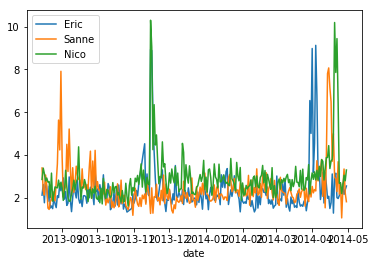

In [35]:
eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()